#Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import tensorflow as tf
import matplotlib.pyplot as plt
plt.rcParams['axes.spines.right'] = False
plt.rcParams['axes.spines.top'] = False

import warnings
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB,BernoulliNB
from sklearn.experimental import enable_hist_gradient_boosting
from sklearn.ensemble import (RandomForestClassifier, 
                              GradientBoostingClassifier, 
                              HistGradientBoostingClassifier)

from xgboost import XGBClassifier
from sklearn.ensemble import AdaBoostClassifier
from lightgbm import LGBMClassifier
from sklearn.datasets import make_classification
!pip3 install catboost
from catboost import CatBoostClassifier

from sklearn.metrics import cohen_kappa_score

from sklearn.metrics import accuracy_score,confusion_matrix,roc_auc_score,ConfusionMatrixDisplay,precision_score,recall_score,f1_score,classification_report,roc_curve,plot_roc_curve,auc,precision_recall_curve,plot_precision_recall_curve,average_precision_score
from sklearn.model_selection import cross_val_score
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
warnings.filterwarnings("ignore")
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.decomposition import PCA
from sklearn.preprocessing import RobustScaler
rb=RobustScaler()
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
lda = LinearDiscriminantAnalysis()
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import LabelEncoder
from yellowbrick.classifier import ROCAUC


/usr/local/lib/python3.7/dist-packages/sklearn/experimental/enable_hist_gradient_boosting.py:17: UserWarning: Since version 1.0, it is not needed to import enable_hist_gradient_boosting anymore. HistGradientBoostingClassifier and HistGradientBoostingRegressor are now stable and can be normally imported from sklearn.ensemble.
  "Since version 1.0, "


     |████████████████████████████████| 76.1 MB 1.2 MB/s 


#Importing Dataset

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
path="/content/drive/MyDrive/ObesityDataSet_raw_and_data_sinthetic.csv"
dataset=pd.read_csv(path)
dataset

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,Female,21.000000,1.620000,64.000000,yes,no,2.0,3.0,Sometimes,no,2.000000,no,0.000000,1.000000,no,Public_Transportation,Normal_Weight
1,Female,21.000000,1.520000,56.000000,yes,no,3.0,3.0,Sometimes,yes,3.000000,yes,3.000000,0.000000,Sometimes,Public_Transportation,Normal_Weight
2,Male,23.000000,1.800000,77.000000,yes,no,2.0,3.0,Sometimes,no,2.000000,no,2.000000,1.000000,Frequently,Public_Transportation,Normal_Weight
3,Male,27.000000,1.800000,87.000000,no,no,3.0,3.0,Sometimes,no,2.000000,no,2.000000,0.000000,Frequently,Walking,Overweight_Level_I
4,Male,22.000000,1.780000,89.800000,no,no,2.0,1.0,Sometimes,no,2.000000,no,0.000000,0.000000,Sometimes,Public_Transportation,Overweight_Level_II
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2106,Female,20.976842,1.710730,131.408528,yes,yes,3.0,3.0,Sometimes,no,1.728139,no,1.676269,0.906247,Sometimes,Public_Transportation,Obesity_Type_III
2107,Female,21.982942,1.748584,133.742943,yes,yes,3.0,3.0,Sometimes,no,2.005130,no,1.341390,0.599270,Sometimes,Public_Transportation,Obesity_Type_III
2108,Female,22.524036,1.752206,133.689352,yes,yes,3.0,3.0,Sometimes,no,2.054193,no,1.414209,0.646288,Sometimes,Public_Transportation,Obesity_Type_III
2109,Female,24.361936,1.739450,133.346641,yes,yes,3.0,3.0,Sometimes,no,2.852339,no,1.139107,0.586035,Sometimes,Public_Transportation,Obesity_Type_III


In [4]:
dataset.drop(dataset.columns[[5,6,7,8,9,10,14]], axis = 1, inplace = True)
dataset

,Gender,Age,Height,Weight,family_history_with_overweight,SCC,FAF,TUE,MTRANS,NObeyesdad
0,Female,21.000000,1.620000,64.000000,yes,no,0.000000,1.000000,Public_Transportation,Normal_Weight
1,Female,21.000000,1.520000,56.000000,yes,yes,3.000000,0.000000,Public_Transportation,Normal_Weight
2,Male,23.000000,1.800000,77.000000,yes,no,2.000000,1.000000,Public_Transportation,Normal_Weight
3,Male,27.000000,1.800000,87.000000,no,no,2.000000,0.000000,Walking,Overweight_Level_I
4,Male,22.000000,1.780000,89.800000,no,no,0.000000,0.000000,Public_Transportation,Overweight_Level_II
...,...,...,...,...,...,...,...,...,...,...
2106,Female,20.976842,1.710730,131.408528,yes,no,1.676269,0.906247,Public_Transportation,Obesity_Type_III
2107,Female,21.982942,1.748584,133.742943,yes,no,1.341390,0.599270,Public_Transportation,Obesity_Type_III
2108,Female,22.524036,1.752206,133.689352,yes,no,1.414209,0.646288,Public_Transportation,Obesity_Type_III
2109,Female,24.361936,1.739450,133.346641,yes,no,1.139107,0.586035,Public_Transportation,Obesity_Type_III


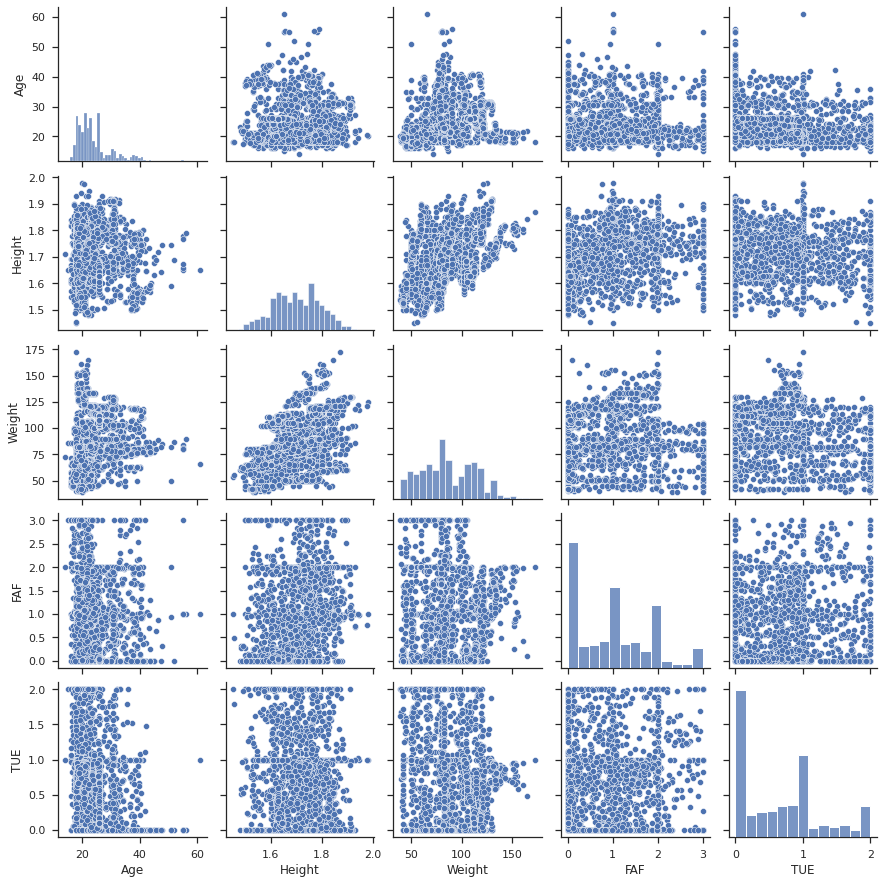

In [5]:
sns.set(style="ticks", color_codes=True)

g = sns.pairplot(dataset)
plt.show()

In [6]:
dataset.isnull().values.any()

False

In [7]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2111 entries, 0 to 2110
Data columns (total 10 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Gender                          2111 non-null   object 
 1   Age                             2111 non-null   float64
 2   Height                          2111 non-null   float64
 3   Weight                          2111 non-null   float64
 4   family_history_with_overweight  2111 non-null   object 
 5   SCC                             2111 non-null   object 
 6   FAF                             2111 non-null   float64
 7   TUE                             2111 non-null   float64
 8   MTRANS                          2111 non-null   object 
 9   NObeyesdad                      2111 non-null   object 
dtypes: float64(5), object(5)
memory usage: 165.0+ KB


In [8]:
dataset['NObeyesdad'].value_counts()

Obesity_Type_I         351
Obesity_Type_III       324
Obesity_Type_II        297
Overweight_Level_I     290
Overweight_Level_II    290
Normal_Weight          287
Insufficient_Weight    272
Name: NObeyesdad, dtype: int64

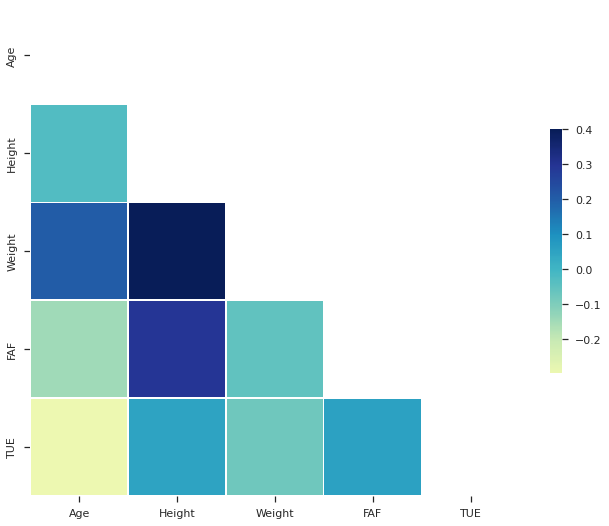

In [9]:
corr = dataset.corr()
mask = np.triu(np.ones_like(corr, dtype=bool))
f, ax = plt.subplots(figsize=(11, 9))
cmap = sns.diverging_palette(230, 20, as_cmap=True)
sns.heatmap(corr, mask=mask, cmap='YlGnBu', vmax=.4, center=0, square=True, linewidths=.5, cbar_kws={"shrink": .5})

In [10]:
# Convert Gender,family_history_with_overweight and SCC into 0's and 1's
dataset['Gender']=dataset['Gender'].apply(lambda x : 1 if x=='Male' else 0)
dataset["family_history_with_overweight"] = dataset["family_history_with_overweight"].apply(lambda x: 1 if x=="yes" else 0)
dataset["SCC"] = dataset["SCC"].apply(lambda x: 1 if x=="yes" else 0)

# label encoding
lbl_encode=LabelEncoder()
dataset['NObeyesdad']=lbl_encode.fit_transform(dataset['NObeyesdad'])

# One Hot encoding MTRANS
data_dummies = dataset[['MTRANS']]
data_dummies=pd.get_dummies(data_dummies)
dataset.drop(columns=['MTRANS'],inplace=True)
data_NObeyesdad=dataset['NObeyesdad']
dataset.drop(columns=['NObeyesdad'],inplace=True)
dataset=dataset.merge(data_dummies,left_index=True, right_index=True,how='left')
dataset

,Gender,Age,Height,Weight,family_history_with_overweight,SCC,FAF,TUE,MTRANS_Automobile,MTRANS_Bike,MTRANS_Motorbike,MTRANS_Public_Transportation,MTRANS_Walking
0,0,21.000000,1.620000,64.000000,1,0,0.000000,1.000000,0,0,0,1,0
1,0,21.000000,1.520000,56.000000,1,1,3.000000,0.000000,0,0,0,1,0
2,1,23.000000,1.800000,77.000000,1,0,2.000000,1.000000,0,0,0,1,0
3,1,27.000000,1.800000,87.000000,0,0,2.000000,0.000000,0,0,0,0,1
4,1,22.000000,1.780000,89.800000,0,0,0.000000,0.000000,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2106,0,20.976842,1.710730,131.408528,1,0,1.676269,0.906247,0,0,0,1,0
2107,0,21.982942,1.748584,133.742943,1,0,1.341390,0.599270,0,0,0,1,0
2108,0,22.524036,1.752206,133.689352,1,0,1.414209,0.646288,0,0,0,1,0
2109,0,24.361936,1.739450,133.346641,1,0,1.139107,0.586035,0,0,0,1,0


In [11]:
data_NObeyesdad.head(10)

0    1
1    1
2    1
3    5
4    6
5    1
6    1
7    1
8    1
9    1
Name: NObeyesdad, dtype: int64

In [12]:
X = dataset.values
y = data_NObeyesdad.values

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0) 

print("X_train dataset: ", X_train.shape)
print("y_train dataset: ", y_train.shape)
print("X_test dataset: ", X_test.shape)
print("y_test dataset: ", y_test.shape)

X_train dataset:  (1688, 13)
y_train dataset:  (1688,)
X_test dataset:  (423, 13)
y_test dataset:  (423,)


In [14]:
scaler = StandardScaler()
scaler.fit(X_train)

X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [15]:
models = []
models.append(['Logistic Regression',LogisticRegression(random_state=0)])
models.append(['SVM',SVC(random_state=0,probability=True)])
models.append(['KNeigbors',KNeighborsClassifier()])
models.append(['GaussianNB',GaussianNB()])
models.append(['BernoulliNB',BernoulliNB()])
models.append(['DecisionTree',DecisionTreeClassifier(random_state=0)])
models.append(['RandomForest',RandomForestClassifier(random_state=0)])
models.append(['XGBClassifier',XGBClassifier(random_state=0)])
models.append(['AdaBoostClassifier',AdaBoostClassifier()])
models.append(['GradientBoostingClassifier', GradientBoostingClassifier(random_state=0)])
models.append(['HistGradientBoostingClassifier', HistGradientBoostingClassifier(random_state=0)])
models.append(['LGBMClassifier', LGBMClassifier(n_estimators=200, random_state=0)])
models.append(['CatBoostClassifier', CatBoostClassifier(verbose=0, n_estimators=100)])

Logistic Regression :
[[65  0  0  0  0  0  0]
 [10 43  0  0  0  3  1]
 [ 0  0 62  3  0  0  2]
 [ 0  0  0 53  0  0  0]
 [ 0  0  0  0 69  0  0]
 [ 0  3  0  0  0 49  5]
 [ 0  0  3  2  0  7 43]]
Accuracy Score:  0.9078014184397163

K-Fold Validation Mean Accuracy: 87.56 %

ROC AUC Score: 0.99 %

Precision: 0.95 %

Recall: 0.85 %

F1 Score: 0.89 %

Cohen Score: 0.89 %
----------------------------------------

SVM :
[[60  5  0  0  0  0  0]
 [ 5 41  0  0  0 11  0]
 [ 0  0 65  1  0  1  0]
 [ 0  0  0 53  0  0  0]
 [ 0  0  0  0 69  0  0]
 [ 1  5  0  0  0 45  6]
 [ 0  4  3  0  0  5 43]]
Accuracy Score:  0.8888888888888888

K-Fold Validation Mean Accuracy: 85.37 %

ROC AUC Score: 0.99 %

Precision: 0.86 %

Recall: 0.85 %

F1 Score: 0.86 %

Cohen Score: 0.87 %
----------------------------------------

KNeigbors :
[[57  8  0  0  0  0  0]
 [11 32  2  0  0  9  3]
 [ 1  0 61  0  0  2  3]
 [ 0  0  0 53  0  0  0]
 [ 0  0  0  0 69  0  0]
 [ 2  7  7  0  0 37  4]
 [ 0  4  7  1  0  3 40]]
Accuracy Score:  0.

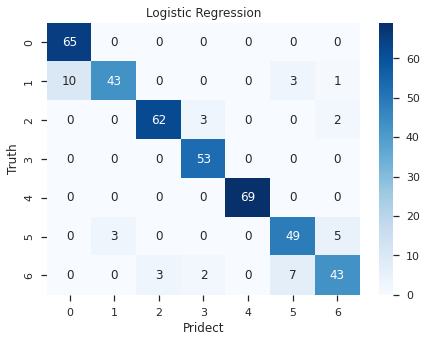

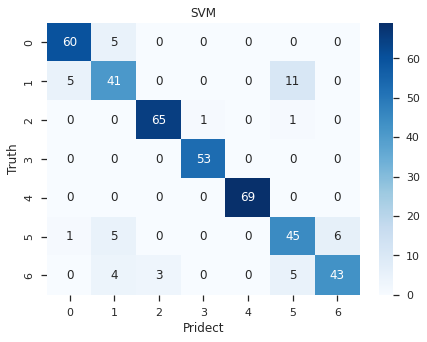

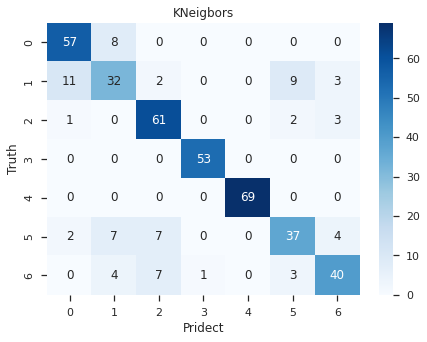

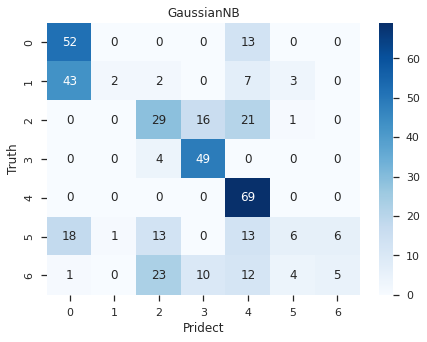

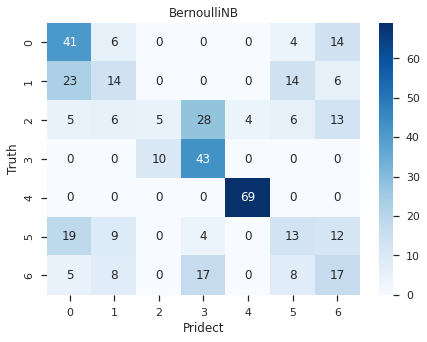

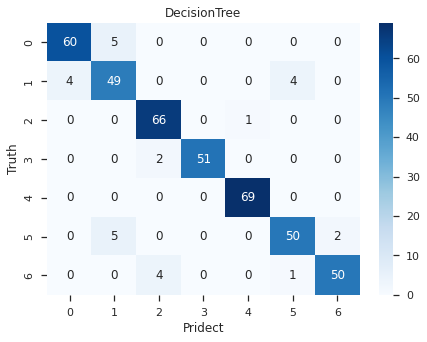

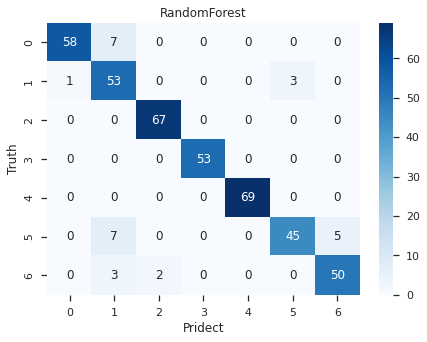

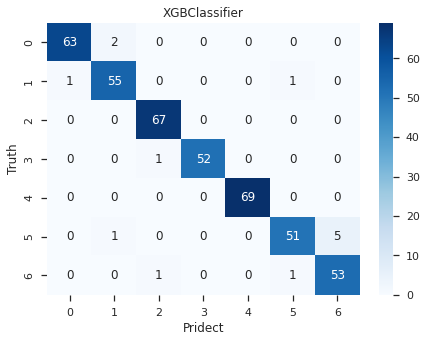

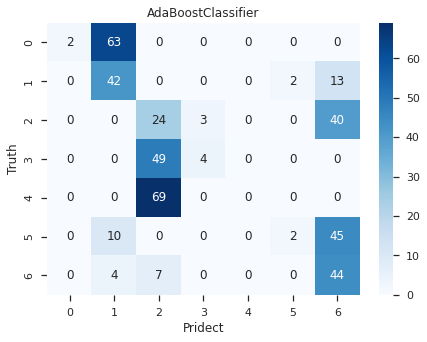

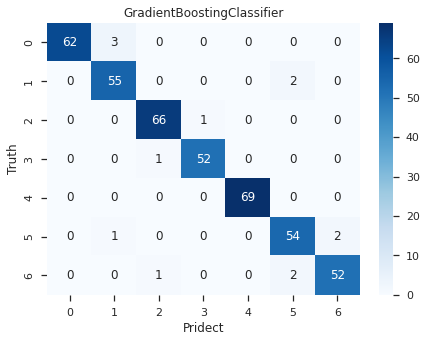

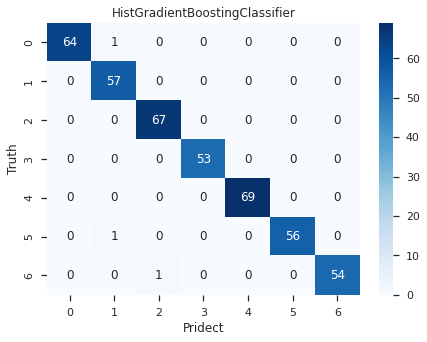

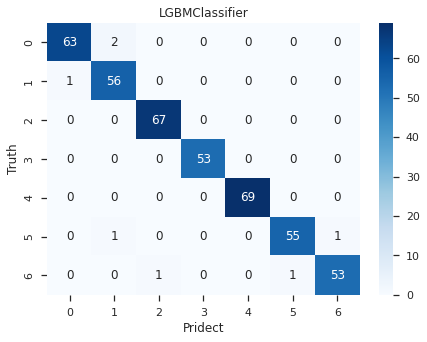

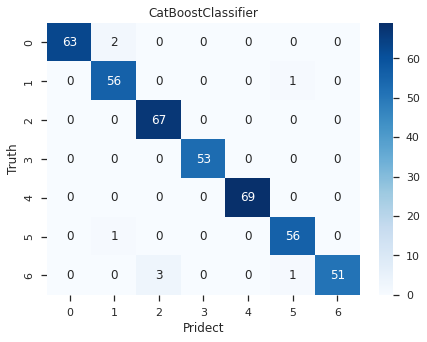

In [16]:
lst_1 = []
for m in range(len(models)):
    lst_2 = []
    model = models[m][1]
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)
    y_pred_roc=model.predict_proba(X_test_scaled)
    cm = confusion_matrix(y_test,y_pred)
    accuracies = cross_val_score(estimator= model, X = X_train_scaled,y = y_train, cv=10)


    roc=roc_auc_score(y_test,y_pred_roc,multi_class="ovo",average='macro',  sample_weight=None,  max_fpr=None )
    precision = precision_score(y_test,y_pred,labels=[1,2], average='micro')
    recall = recall_score(y_test,y_pred,labels=[1,2], average='micro')
    f1 = f1_score(y_test,y_pred,labels=[1,2], average='micro')
    cohen_score = cohen_kappa_score(y_test, y_pred)
    print(models[m][0],':')
    print(cm)
    plt.figure(figsize=(7,5))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(models[m][0])
    plt.xlabel('Pridect')
    plt.ylabel('Truth')
    print('Accuracy Score: ',accuracy_score(y_test,y_pred))
    print('')
    print('K-Fold Validation Mean Accuracy: {:.2f} %'.format(accuracies.mean()*100))
    print('')
    # print('Standard Deviation: {:.2f} %'.format(accuracies.std()*100))
    # print('')
    print('ROC AUC Score: {:.2f} %'.format(roc))
    print('')
    print('Precision: {:.2f} %'.format(precision))
    print('')
    print('Recall: {:.2f} %'.format(recall))
    print('')
    print('F1 Score: {:.2f} %'.format(f1))
    print('')
    print('Cohen Score: {:.2f} %'.format(cohen_score))
    print('-'*40)
    print('')
    lst_2.append(models[m][0])
    lst_2.append(accuracy_score(y_test,y_pred)*100)
    lst_2.append(accuracies.mean()*100)
    # lst_2.append(accuracies.std()*100)
    lst_2.append(roc)
    lst_2.append(precision)
    lst_2.append(recall)
    lst_2.append(f1)
    lst_2.append(cohen_score)
    lst_1.append(lst_2)

In [17]:
df2 = pd.DataFrame(lst_1,columns=['Model','Accuracy','K-Fold Mean Accuracy','RoC-AuC','Precision','Recall','F1 Score', 'Cohen-Kappa Score'])

df2.sort_values(by=['Accuracy','K-Fold Mean Accuracy'],inplace=True,ascending=False)
df2

,Model,Accuracy,K-Fold Mean Accuracy,RoC-AuC,Precision,Recall,F1 Score,Cohen-Kappa Score
10,HistGradientBoostingClassifier,99.290780,97.216117,0.999946,0.976378,1.000000,0.988048,0.991712
11,LGBMClassifier,98.345154,97.097422,0.999795,0.968504,0.991935,0.980080,0.980662
12,CatBoostClassifier,98.108747,96.270076,0.999394,0.953488,0.991935,0.972332,0.977897
9,GradientBoostingClassifier,96.926714,95.497323,0.998899,0.952756,0.975806,0.964143,0.964090
7,XGBClassifier,96.926714,95.082418,0.998897,0.960630,0.983871,0.972112,0.964085
6,RandomForest,93.380615,93.960623,0.997102,0.863309,0.967742,0.912548,0.922664
5,DecisionTree,93.380615,93.900042,0.959696,0.877863,0.927419,0.901961,0.922616
0,Logistic Regression,90.780142,87.561989,0.989981,0.945946,0.846774,0.893617,0.892229
1,SVM,88.888889,85.366300,0.986391,0.861789,0.854839,0.858300,0.870140
2,KNeigbors,82.505910,79.683009,0.949651,0.726562,0.750000,0.738095,0.795369


Text(0.5, 1.0, 'Model Compare Graphic')

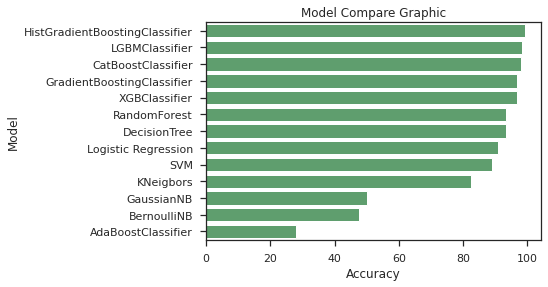

In [18]:
sns.barplot(x='Accuracy',y='Model',data=df2,color='g')
plt.title('Model Compare Graphic')

In [19]:
grid_models = [(HistGradientBoostingClassifier(),[{'loss':['auto'], 'learning_rate':[0.1], 'max_iter':[100], 'max_leaf_nodes':[31], 'max_depth':[None], 'min_samples_leaf':[20], 'l2_regularization':[0.0], 'max_bins':[255], 'categorical_features':[None], 'monotonic_cst':[None], 'warm_start':[False], 'early_stopping':['auto'], 'scoring':['loss'], 'validation_fraction':[0.1], 'n_iter_no_change':[10], 'tol':[1e-07], 'verbose':[0], 'random_state':[None]}]), 
               (LGBMClassifier(),[{'boosting_type':['gbdt'], 'num_leaves':[31], 'max_depth': [1], 'learning_rate':[0.1], 'n_estimators':[100], 'subsample_for_bin':[200000], 'objective':[None], 'class_weight':[None], 'min_split_gain':[0.0], 'min_child_weight':[0.001], 'min_child_samples':[20], 'subsample':[1.0], 'subsample_freq':[0], 'colsample_bytree':[1.0], 'reg_alpha':[0.0], 'reg_lambda':[0.0], 'random_state':[None], 'n_jobs':[ 1], 'importance_type':['split']}]), 
               (XGBClassifier(), [{'learning_rate': [0.01, 0.05, 0.1], 'eval_metric': ['error']}]),
               (CatBoostClassifier(), [{'max_depth': [3,4,5],'n_estimators':[100, 200, 300]}]),
               (GradientBoostingClassifier(),[{'learning_rate':[0.1],'n_estimators':[100],'subsample':[1.0],'criterion':['friedman_mse'], 'min_samples_split':[2], 'min_samples_leaf':[1], 'min_weight_fraction_leaf':[0.0], 'max_depth':[3], 'min_impurity_decrease':[0.0], 'init':[None], 'random_state':[None], 'max_features':[None], 'verbose':[0], 'max_leaf_nodes':[None], 'warm_start':[False], 'validation_fraction':[0.1], 'n_iter_no_change':[None], 'tol':[0.0001], 'ccp_alpha':[0.0]}]),
               (RandomForestClassifier(),[{'n_estimators':[100,150,200],'criterion':['gini','entropy'],'random_state':[0]}]),
               (DecisionTreeClassifier(),[{'criterion':['gini','entropy'],'random_state':[0]}]),
                (SVC(), [{'C': [0.1, 1, 10, 100, 1000],'gamma': [1, 0.1, 0.01, 0.001, 0.0001],'kernel': ['rbf']}])]

In [20]:
from sklearn.model_selection import GridSearchCV

In [21]:
for i,j in grid_models:
    grid = GridSearchCV(estimator=i,param_grid = j, scoring = 'accuracy',cv = 10)
    grid.fit(X_train_scaled, y_train)
    best_accuracy = grid.best_score_
    best_param = grid.best_params_
    print(' {}: \n Best Accuracy: {:.2f} %'.format(i,best_accuracy*100))
    print(' Best Parameters is', best_param)
    print('')
    print('-'*25)
    print('')

Streaming output truncated to the last 5000 lines.
149:	learn: 0.0464772	total: 833ms	remaining: 278ms
150:	learn: 0.0463031	total: 841ms	remaining: 273ms
151:	learn: 0.0459513	total: 846ms	remaining: 267ms
152:	learn: 0.0453915	total: 851ms	remaining: 262ms
153:	learn: 0.0452433	total: 857ms	remaining: 256ms
154:	learn: 0.0450954	total: 862ms	remaining: 250ms
155:	learn: 0.0450051	total: 867ms	remaining: 245ms
156:	learn: 0.0447555	total: 872ms	remaining: 239ms
157:	learn: 0.0443549	total: 877ms	remaining: 233ms
158:	learn: 0.0441924	total: 884ms	remaining: 228ms
159:	learn: 0.0439871	total: 889ms	remaining: 222ms
160:	learn: 0.0436535	total: 894ms	remaining: 217ms
161:	learn: 0.0427911	total: 899ms	remaining: 211ms
162:	learn: 0.0425552	total: 904ms	remaining: 205ms
163:	learn: 0.0419477	total: 910ms	remaining: 200ms
164:	learn: 0.0416173	total: 915ms	remaining: 194ms
165:	learn: 0.0414384	total: 920ms	remaining: 188ms
166:	learn: 0.0411055	total: 925ms	remaining: 183ms
167:	learn: 0

In [22]:
tuned_models = []

tuned_models.append(['HistGradientBoostingClassifier',HistGradientBoostingClassifier(learning_rate=0.1 , random_state=0)])
tuned_models.append(['LGBMClassifier',LGBMClassifier(learning_rate=0.1,n_estimators=200 , random_state=None)])
tuned_models.append(['XGBClassifier',XGBClassifier(random_state=0, eval_metric= 'error', learning_rate= 0.1)])
tuned_models.append(['GradientBoostingClassifier',GradientBoostingClassifier(n_estimators=200, learning_rate=0.1 , random_state=0)])
tuned_models.append(['RandomForest',RandomForestClassifier(criterion= 'entropy', n_estimators= 200, random_state= 0)])
tuned_models.append(['DecisionTree',DecisionTreeClassifier(criterion= 'gini', random_state= 0)])
#tuned_models.append(['SVM',SVC(random_state=0, C= 1, gamma= 1, kernel= 'rbf')])
tuned_models.append(['CatBoostClassifier', CatBoostClassifier(verbose=0, n_estimators=100)])

HistGradientBoostingClassifier :
[[64  1  0  0  0  0  0]
 [ 0 57  0  0  0  0  0]
 [ 0  0 67  0  0  0  0]
 [ 0  0  0 53  0  0  0]
 [ 0  0  0  0 69  0  0]
 [ 0  1  0  0  0 56  0]
 [ 0  0  1  0  0  0 54]]
Accuracy Score:  0.9929078014184397

K-Fold Validation Mean Accuracy: 97.22 %

ROC AUC Score: 1.00 %

Precision: 0.98 %

Recall: 1.00 %

F1 Score: 0.99 %

Cohen Score: 0.99 %
----------------------------------------

LGBMClassifier :
[[63  2  0  0  0  0  0]
 [ 1 56  0  0  0  0  0]
 [ 0  0 67  0  0  0  0]
 [ 0  0  0 53  0  0  0]
 [ 0  0  0  0 69  0  0]
 [ 0  1  0  0  0 55  1]
 [ 0  0  1  0  0  1 53]]
Accuracy Score:  0.983451536643026

K-Fold Validation Mean Accuracy: 97.10 %

ROC AUC Score: 1.00 %

Precision: 0.97 %

Recall: 0.99 %

F1 Score: 0.98 %

Cohen Score: 0.98 %
----------------------------------------

XGBClassifier :
[[63  2  0  0  0  0  0]
 [ 1 55  0  0  0  1  0]
 [ 0  0 67  0  0  0  0]
 [ 0  0  1 52  0  0  0]
 [ 0  0  0  0 69  0  0]
 [ 0  1  0  0  0 51  5]
 [ 0  0  1  0  0  1

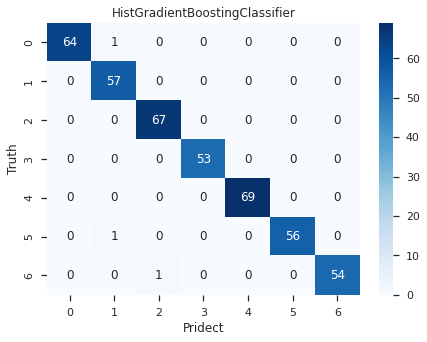

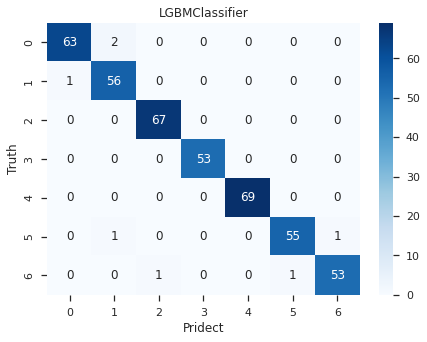

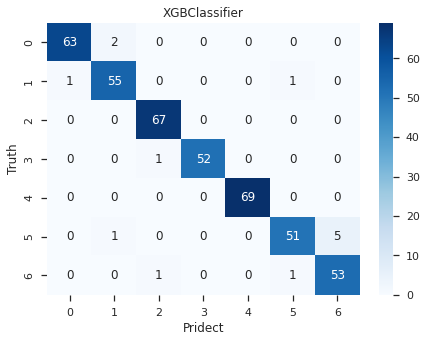

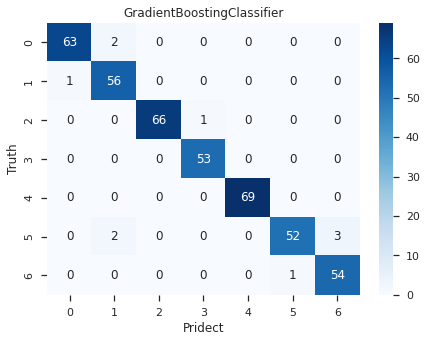

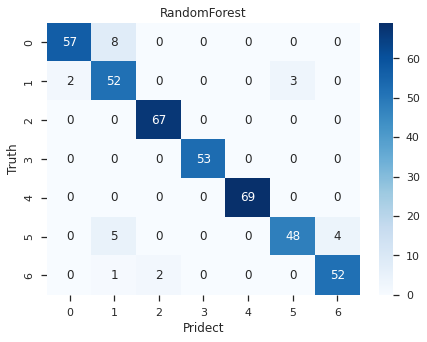

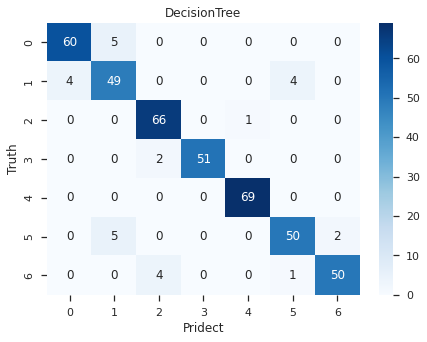

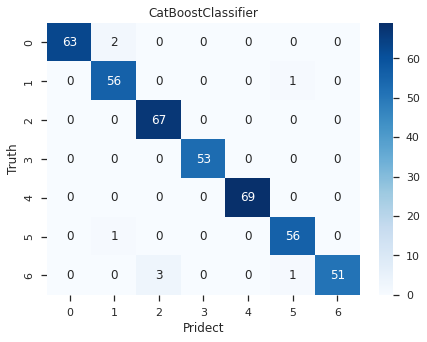

In [23]:
lst_3 = []
for m in range(len(tuned_models)):
    lst_4 = []
    model = tuned_models[m][1]
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)
    y_pred_roc=model.predict_proba(X_test_scaled)
    cm = confusion_matrix(y_test,y_pred)
    accuracies = cross_val_score(estimator= model, X = X_train_scaled,y = y_train, cv=10)


    roc=roc_auc_score(y_test,y_pred_roc,multi_class="ovo",average='macro',  sample_weight=None,  max_fpr=None )
    precision = precision_score(y_test,y_pred,labels=[1,2], average='micro')
    recall = recall_score(y_test,y_pred,labels=[1,2], average='micro')
    f1 = f1_score(y_test,y_pred,labels=[1,2], average='micro')
    cohen_score = cohen_kappa_score(y_test, y_pred)
    print(tuned_models[m][0],':')
    print(cm)
    plt.figure(figsize=(7,5))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(tuned_models[m][0])
    plt.xlabel('Pridect')
    plt.ylabel('Truth')
    print('Accuracy Score: ',accuracy_score(y_test,y_pred))
    print('')
    print('K-Fold Validation Mean Accuracy: {:.2f} %'.format(accuracies.mean()*100))
    print('')
    # print('Standard Deviation: {:.2f} %'.format(accuracies.std()*100))
    # print('')
    print('ROC AUC Score: {:.2f} %'.format(roc))
    print('')
    print('Precision: {:.2f} %'.format(precision))
    print('')
    print('Recall: {:.2f} %'.format(recall))
    print('')
    print('F1 Score: {:.2f} %'.format(f1))
    print('')
    print('Cohen Score: {:.2f} %'.format(cohen_score))
    print('-'*40)
    print('')
    lst_4.append(tuned_models[m][0])
    lst_4.append(accuracy_score(y_test,y_pred)*100)
    lst_4.append(accuracies.mean()*100)
    # lst_4.append(accuracies.std()*100)
    lst_4.append(roc)
    lst_4.append(precision)
    lst_4.append(recall)
    lst_4.append(f1)
    lst_4.append(cohen_score)
    lst_3.append(lst_4)

In [24]:
df3 = pd.DataFrame(lst_3,columns=['Model','Accuracy','K-Fold Mean Accuracy','RoC-AuC','Precision','Recall','F1 Score', 'Cohen-Kappa Score'])

df3.sort_values(by=['Accuracy','K-Fold Mean Accuracy'],inplace=True,ascending=False)
df3

,Model,Accuracy,K-Fold Mean Accuracy,RoC-AuC,Precision,Recall,F1 Score,Cohen-Kappa Score
0,HistGradientBoostingClassifier,99.290780,97.216117,0.999946,0.976378,1.000000,0.988048,0.991712
1,LGBMClassifier,98.345154,97.097422,0.999795,0.968504,0.991935,0.980080,0.980662
6,CatBoostClassifier,98.108747,96.270076,0.999394,0.953488,0.991935,0.972332,0.977897
3,GradientBoostingClassifier,97.635934,96.268667,0.999376,0.968254,0.983871,0.976000,0.972380
2,XGBClassifier,96.926714,95.082418,0.998897,0.960630,0.983871,0.972112,0.964085
4,RandomForest,94.089835,94.137433,0.997739,0.881481,0.959677,0.918919,0.930951
5,DecisionTree,93.380615,93.900042,0.959696,0.877863,0.927419,0.901961,0.922616


Text(0.5, 1.0, 'Model Compare Graphic')

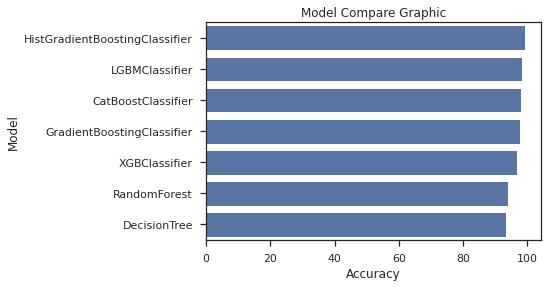

In [25]:
sns.barplot(x='Accuracy',y='Model',data=df3,color='b')
plt.title('Model Compare Graphic')

In [26]:
def plot_ROC_curve(model, X_train_scaled, y_train, X_test_scaled, y_test):

    # Creating visualization with the readable labels
    visualizer = ROCAUC(model)
                                        
    # Fitting to the training data first then scoring with the test data                                    
    visualizer.fit(X_train_scaled, y_train)
    visualizer.score(X_test_scaled, y_test)
    visualizer.show()
    
    return visualizer

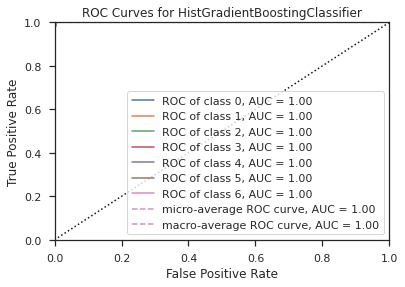

ROCAUC(ax=<matplotlib.axes._subplots.AxesSubplot object at 0x7f1984e1fb90>,
       estimator=HistGradientBoostingClassifier(random_state=0))

In [27]:
plot_ROC_curve(HistGradientBoostingClassifier(learning_rate=0.1 , random_state=0),X_train_scaled, y_train, X_test_scaled, y_test)
